### Problem 1
A company's stock currently does not pay any dividend because it has good investment opportunities internally. It is considering two potential plans for the future:
- **Plan A:** Pay no dividend for the next 5 years, investing all earnings into growing thecompany. Six years from today, pay the first annual dividend. The expected size of this rst dividend is \$0.50 per share, and dividends will subsequently grow at an average rate of 4% per year. Investors' required rate of return over the first five years will be 12%, and subsequently will be a constant 8%.
- **Plan B:** Pay a $0.10 per share dividend in one year, and grow that dividend at 25% per year for the following four years (up through the fifth dividend). Starting in the sixth year, slow down the dividend growth to an average of 4% per year and keep this growth rate forever. Investors' required rate of return over the first five years will be 10%, and subsequently will be a constant 8%.

**(a) What would be the share price today if the company implements Plan A?**

Using the Dividend Growth Model at period 6 $$ P_{6} =  \frac{D_{6}(1+g)}{r-g} = \frac{0.5(1.04)}{0.04} = \$ 13 $$

Discounting for current price $$P_{0}=\frac{P_{6}}{(1+r)^{6}} = \frac{13}{(1.12)^{6}} = \$ 1.458 $$


**(b) What would be the share price today if the company implements Plan B?**


Using annuity Equations with real rate $$ P_{0} = \frac{0.1}{(1.1)} +\frac{0.1(1.25)}{(1.1)^{2}}+\frac{0.1(1.25)^{2}}{(1.1)^{3}}+\frac{0.1(1.25)^{3}}{(1.1)^{4}}+\frac{0.1(1.25)^{4}}{(1.1)^{5}}+\frac{P_{6}}{(1.1)^{6}}$$

$$ = \frac{0.1}{1.1} +\frac{0.125}{1.21}+\frac{0.156}{1.331}+\frac{0.195}{1.464}+\frac{0.244}{1.611}+\frac{P_{6}}{1.772} $$

0.305

$$ = 0.091 + 0.103 + 0.117 + 0.133 + 0.151 + \frac{P_{6}}{1.772} $$


Using the Dividend Growth Model at period 6 $$ P_{6} =  \frac{D_{6}(1+g)}{r-g} = \frac{0.305(1.04)}{0.04} = \$ 7.930 $$


$$ P_{0} = 0.595 + \frac{7.930}{1.772} 0.595 + 4.475 = 5.070  $$



### Problem 2

Suppose the limit order book for a stock currently looks like the following:

| Ask | Quant | Bid | Quant |
|  :---: | :---: | :---: | :---: |
|  \$5.57 | 100 |  \$5.49 | 250 |
|  \$5.58 | 250 |  \$5.48 | 750 |
|  \$5.62 | 1500 |  \$5.44 | 3750 |

**(a) If you submitted a market buy order for 1500 shares, what is the average price you would pay when the order is filled?**

$$P_{AVG} = \frac{100}{1500} \cdot 5.57 + \frac{250}{1500} \cdot 5.58 + \frac{1150}{1500} \cdot 5.62 = 0.371+ 0.930+ 4.309 = 5.610 $$

**(b) What would the limit order book look like after the market buy order you submitted as in part (a) is filled, assuming no other orders were submitted?**

| Ask | Quant | Bid | Quant |
|  :---: | :---: | :---: | :---: |
|  \$5.62 | 350 |  \$5.49 | 250 |
|   |  |  \$5.48 | 750 |
|   |  |  \$5.44 | 3750 |

**(c) Suppose you submitted this 1500 share buy order to a dark pool instead, and the order will be filled in its full amount at the midpoint of the current bid-ask spread, what dollar amount would you save by buying in the dark pool compared to buying through a market order as in part (a)?**

$$P = \frac{5.57+5.49}{2} = \$5.530 $$

$$S = (5.610-5.30)1500 = \$465 $$


**(d) If, including your 1500 share order, the dark pool received buy orders for 25000 shares in total and sell orders for 20000 shares in total, how many shares in your order will be filled?**

Of the 25,000 orders, only 20,000 will be fulfilled. Assuming equal attribution among the orders, $\frac{20,000}{25,000}\cdot 1500 = 1200 $ Orders will be fulfilled


### Problem 3
Note
- Code Base, mostly form HW1
- Used S&P all 500 members that was constantly present from \~2000 - 2020 instead (488 stocks total). As did not have the time to collect new data in the suggested range in the Homework.
- data is split into a divisible 8 octiles of 61 Stocks Each, instead of the 5 suggested (indivisble)

In [1]:

import datetime as dt
import pandas as pd 
import numpy as np
from pathlib import Path
import sklearn.neural_network as skl_nn
import matplotlib.pyplot as plt
import sklearn.linear_model as skllm
import sklearn.model_selection as skl_ms
import scipy.stats as sps
import math

def format_csv(name : str)->pd.DataFrame:
    df = pd.read_csv(r"{}.csv".format(name))
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date",inplace=True)
    return df 

def add_period_ret(name: str, period: int, df : pd.DataFrame): 
    df[name] = (df["Adj Close"] - df["Adj Close"].shift(period))/df["Adj Close"].shift(period)
    return df       

def portfolio_performance(data: pd.DataFrame, weights: list):
    port = data*weights
    port_ret = port.sum(1).mean()
    port_var = port.sum(1).var()

    return port_ret, port_var

def portfolio_performance2(Xm, XCov, weights: list):
    port_ret = Xm.dot(weights).mean()
    port_var = XCov.dot(weights).dot(weights)

    return port_ret, port_var

class Portf:
    def __init__(self,data: pd.DataFrame) -> None:
        self.data = data
        pass

    def test_weights(self,Weights: pd.DataFrame):
        Xm = self.data.mean()
        XCov = self.data.cov()
        l = len(Weights.index)
        results = pd.DataFrame(np.zeros([l,3]))
        for i in range(0,l):
            [port_ret, port_var] = portfolio_performance2(Xm,XCov,list(Weights.iloc[i,:]))
            results.iloc[i,:] = [port_ret, port_var, set(Weights.iloc[i,:])]
        results.columns = ["Port_Ret", "Port_Var", "Weights"]

        self.results = results
        self.results["Port_Sharpe"]=self.results["Port_Ret"]/self.results["Port_Var"]

        self.min_var_port_res = self.results[self.results["Port_Var"]==self.results["Port_Var"].min()]
        self.max_sharpe_port_res = self.results[self.results["Port_Sharpe"]==self.results["Port_Sharpe"].max()]

        self.min_var_port = pd.DataFrame(list(self.min_var_port_res["Weights"]),columns=self.data.columns)
        self.max_sharpe_port = pd.DataFrame(list(self.max_sharpe_port_res["Weights"]),columns=self.data.columns)

        return results
    
    def GenStats(self): 
        out = pd.DataFrame(index=["AVG","STD","VAR"],columns=self.data.columns)
        out.loc["AVG",:] = self.data.mean()
        out.loc["STD",:] = self.data.std()
        out.loc["VAR",:] = self.data.var()

        return out             

    def GenPort(self,w):
        # generate portfolio given a set of weights
        # w = list(weight["Weights"].values[0])
        out = (self.data*w.values).sum(1)
        return out
        
def gen_number_of_trails(e,b,d):
    m = math.ceil((2/e)*(d-1+math.log(1/b)))
    return m

def gen_weights(trials: int,l:int) -> pd.DataFrame:
    outdf = pd.DataFrame(np.zeros([trials,l]))
    for s in range(0,trials):
        sample = np.random.rand(1,l)
        tval = sample.sum()
        sample=sample/tval
        outdf.iloc[s,:] = sample
    return outdf

class Train_FF3F_RidgeCV:
    def __init__(self, factordata: pd.DataFrame, stockdata: pd.DataFrame) -> None:
        self.factors = list(factordata.columns)
        self.factors.remove("RF")
        self.data = stockdata.join(factordata).dropna(0,how="any",inplace=False)
        pass

    def RunFit(self, fit: str = "1dr",fit_int = True, ts_cv = False):
        self.y = pd.DataFrame()
        # composing "regression target" and "Factor Data"
        self.y["R-RF"]=self.data[fit]-self.data["RF"]
        self.X = self.data.iloc[:,self.data.columns.isin(self.factors)]
        # Timeseries Split Option, Else use Ridge Regression with Cross Validation
        if ts_cv:
            CrossValidationSet = skl_ms.TimeSeriesSplit()
            self.model = skllm.RidgeCV(alphas=(1e-3,1e-2,1e-1,1,10),fit_intercept=fit_int, cv=CrossValidationSet).fit(self.X,self.y)
        else:
            self.model = skllm.RidgeCV(alphas=(1e-3,1e-2,1e-1,1,10),fit_intercept=fit_int).fit(self.X,self.y)
        
        # extract intercept (alpha) and beta values
        self.w = pd.DataFrame(self.model.coef_,columns=self.factors)
        self.c = self.model.intercept_
        
        # extract predicted values
        self.yhat = pd.DataFrame(self.model.predict(self.X),index=self.y.index,columns=["Est"])
        self.error = self.yhat-self.y.values

    def FitStats(self, OutName = "Temp", alpha=0.05, export = False):
        # finding problem variables, number of coefficents
        n = self.X.shape[0]
        k = self.X.shape[1] 
        dof = n-k-1
        self.reg_results = pd.Series()
        # finding Squared Errors 
        SSE = (self.error**2).sum()
        SSR = ((self.yhat-self.y.mean().values)**2).sum()
        SST = SSE + SSR
        
        # finding R2 Score
        R2 = SSR.values/SST

        # finding F Score        
        MSR = (1/k)*SSR
        MSE = (1/dof)*SSE
        F = MSR.values/MSE.values
        if len(F.shape) == 1:
            Fsig = 1-sps.f.cdf(float(F),k,dof)
        else: 
            Fsig = 1-sps.f.cdf(F,k,dof)
        
        #Finding weights standard error
        cm = np.linalg.pinv((self.X.transpose().dot(self.X)).values)*MSE.values
        wse = np.sqrt(list(np.diag(cm)))

        wse = pd.DataFrame(wse,index=self.factors)
        wse = wse.transpose()
        
        # testing weights significance from 0/ null hypotheisis
        tintval = sps.t.interval(1-alpha,dof)
        betasig = pd.DataFrame(1-sps.t.cdf(abs(self.w/wse),dof),columns=self.factors)

        # formating Data
        bounds = pd.DataFrame(index = [0,1],columns=self.factors)
        bounds.iloc[0,:]= tintval[0]*wse+self.w
        bounds.iloc[1,:]= tintval[1]*wse+self.w

        self.beta_results = pd.DataFrame(index = ["LB","Beta","UB","SE","Sig"],columns=self.factors)
        self.beta_results.loc["Beta",:] = self.w.iloc[0,:]
        self.beta_results.loc["LB",:] = bounds.min(0)
        self.beta_results.loc["UB",:] = bounds.max(0)
        self.beta_results.loc["SE",:] = wse.iloc[0,:]
        self.beta_results.loc["Sig",:] = betasig.iloc[0,:]

        self.reg_results["n"] = n
        self.reg_results["k"] = k
        self.reg_results["SSE"] = SSE.values[0]
        self.reg_results["SSR"] = SSR.values[0]
        self.reg_results["MSR"] = MSR.values[0]
        self.reg_results["MSE"] = MSE.values[0]
        self.reg_results["R2"] = R2.values[0]
        self.reg_results["F"] = F[0]
        if len(F.shape)==1:
            self.reg_results["FSig"] = Fsig
        else: 
            self.reg_results["FSig"] = Fsig[0]
        
        self.reg_summary = self.reg_results[self.reg_results.index.isin(["MSE","R2","F","FSig"])]     

        if export: 
            fp = Path('DataOut\{}BetaResults.csv'.format(OutName))  
            fp.parent.mkdir(parents=True, exist_ok=True)  
            self.beta_results.to_csv(fp)

            fp = Path('DataOut\{}RegressionResults.csv'.format(OutName))  
            fp.parent.mkdir(parents=True, exist_ok=True)  
            self.reg_results.to_csv(fp)

    
    def plt(self,OutName="Temp",export=False):
        plt.figure(4).clear()
        plt.plot(self.y)
        plt.plot(self.yhat)
        plt.plot(self.error)
        plt.xlabel("year")
        plt.ylabel("returns")
        plt.title("Predicted vs Actual Returns")
        plt.legend(["y","yhat","error"])
        if export:
            figpath = Path("PictureOut\{}TimeSeries.png".format(OutName))
            plt.savefig(fname=figpath)

        plt.figure(5).clear()
        plt.clf
        plt.scatter(self.y,self.yhat)
        plt.xlabel("actual returns")
        plt.ylabel("predicted returns")
        plt.title("Predicted vs Actual Returns")
        
        if export:
            figpath = Path("PictureOut\{}Scatter.png".format(OutName))
            plt.savefig(fname=figpath)

def GroupAvg(data:pd.DataFrame,num:int,groups:int):
    
    out = list()
    for i in range(0,groups):
        if len(data.shape) == 1:
            out.append(data.iloc[i*num:(i+1)*num].mean())
        else:
            out.append(data.iloc[:,i*num:(i+1)*num].mean(1))
    if len(data.shape) == 1:
        return out
    else:
        out = pd.DataFrame(out)
        return out.T


Importing data and calculating annual average returns

In [2]:
# importing FF3F Data 
FF3FM = pd.read_csv(r"eFF3FD2.csv")
FF3FM["Date"] = pd.to_datetime(FF3FM["Date"])
FF3FM.set_index("Date",inplace=True)

# formating monthly returns
SPXM = pd.read_csv(r"df_monthly_spx.csv")
SPXM["Date"] = pd.to_datetime(SPXM["Dates"])
SPXM.set_index("Date",inplace=True)
SPXM.drop(columns=["Dates"],inplace=True)
SPXM = (SPXM- SPXM.shift(1))/SPXM.shift(1)

FF3FM = FF3FM.iloc[FF3FM.index.isin(SPXM.index),:]
# generating annual returns
SPXA = pd.DataFrame(data=0,columns=SPXM.columns,index=SPXM.index)
for k in np.arange(1,12,1,int):
    SPXA += SPXM.shift(k)
SPXA = SPXA/12

# creating filter for key dates
KeyDates = list()
for i in range(2000,2021):
    for j in ['01','06']:
        date = "{}-{}-01".format(i,j)
        KeyDates.append(date)
        
# Initiating key objects
RESULT = pd.DataFrame(index=SPXM.index,columns=range(1,9))

SPXA = SPXA.iloc[SPXA.index.isin(KeyDates),:]
SPXA = SPXA.iloc[2:,:]
SPXA = SPXA.replace(0,np.NAN).dropna(1)
CURR = pd.DataFrame(index = SPXA.index,columns=range(1,9))
NEXT = pd.DataFrame(index = SPXA.index,columns=range(1,9))

<ipython-input-2-60e178fb26b4>:32: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  SPXA = SPXA.replace(0,np.NAN).dropna(1)


In [3]:
# iterating through key dates
for k in range(0,SPXA.shape[0]-1):
    
    #forming momentum portfolios, by sorting by past average annual returns 
    SPXA = SPXA.sort_values(by=[SPXA.index[k]],axis=1)
    CURR.iloc[k,:] = GroupAvg(SPXA.iloc[k,:],61,8)
    
    #implementing momentum portfolios for the next period and recording results
    Temp = SPXM.reindex(columns=SPXA.columns)
    out = GroupAvg(Temp.loc[KeyDates[k+2]:KeyDates[k+3],:].iloc[1:,:],61,8)
    out.columns = range(1,9)
    RESULT.loc[Temp.loc[KeyDates[k+2]:KeyDates[k+3],:].iloc[1:,:].index,:]= out
    NEXT.iloc[k,:] = GroupAvg(SPXA.iloc[k+1,:],61,8)



                                   1         2         3         4         5  \
Average past 12 Month Ret  -0.034928  0.000822  0.010247  0.018957  0.026723   
Next Month Ret              0.025813  0.015774 -0.019587  0.002507  0.003417   
 Average next 12 Month Ret -0.006938 -0.005130  0.003175  0.006010  0.011412   

                                   6         7         8  
Average past 12 Month Ret   0.033884  0.044088  0.069802  
Next Month Ret             -0.007116 -0.044247 -0.017925  
 Average next 12 Month Ret  0.016434  0.013116  0.032155  
                                   1         2         3         4         5  \
Average past 12 Month Ret  -0.015007  0.000098  0.005124  0.008741  0.012426   
Next Month Ret              0.098985  0.069690  0.068227  0.065685  0.052236   
 Average next 12 Month Ret  0.011072  0.015031  0.013793  0.023397  0.020561   

                                   6         7         8  
Average past 12 Month Ret   0.016461  0.021796  0.038093  
Next

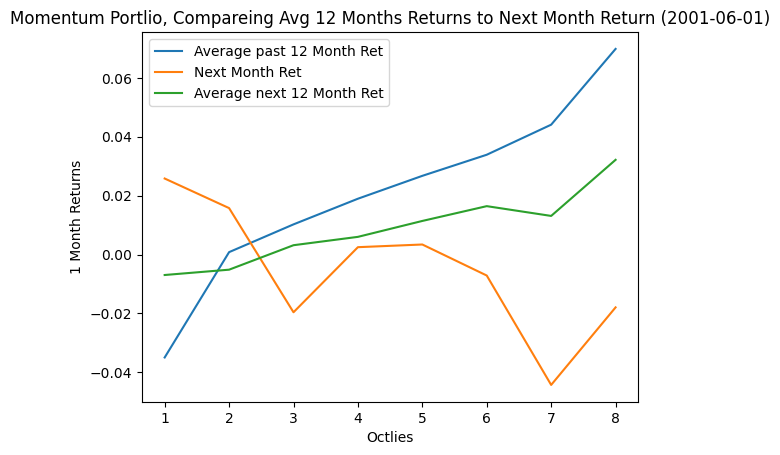

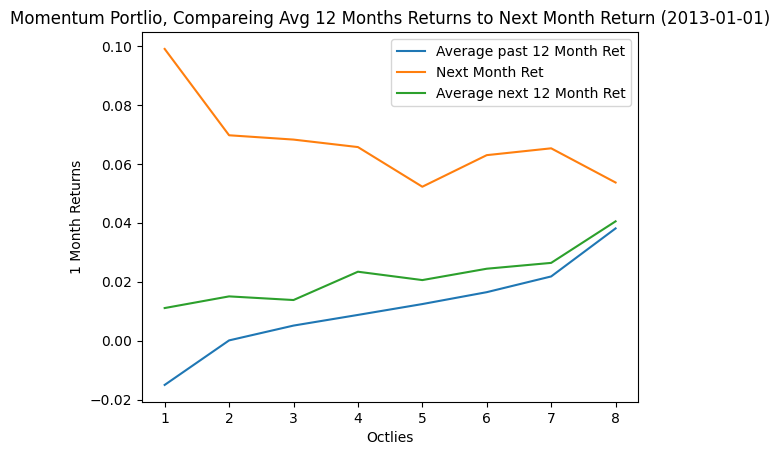

In [4]:
k = 3
temp = pd.DataFrame([CURR.loc[KeyDates[k],:],RESULT.loc[KeyDates[k],:],NEXT.loc[KeyDates[k],:]],index = ["Average past 12 Month Ret","Next Month Ret"," Average next 12 Month Ret"])
print(temp)
plt.plot(temp.T)
plt.ylabel("1 Month Returns")
plt.xlabel("Octlies")
plt.title("Momentum Portlio, Compareing Avg 12 Months Returns to Next Month Return ({})".format(KeyDates[k]))
plt.legend(["Average past 12 Month Ret","Next Month Ret","Average next 12 Month Ret"])

k = 26
temp = pd.DataFrame([CURR.loc[KeyDates[k],:],RESULT.loc[KeyDates[k],:],NEXT.loc[KeyDates[k],:]],index = ["Average past 12 Month Ret","Next Month Ret"," Average next 12 Month Ret"])
print(temp)
plt.figure()
plt.plot(temp.T)
plt.ylabel("1 Month Returns")
plt.xlabel("Octlies")
plt.title("Momentum Portlio, Compareing Avg 12 Months Returns to Next Month Return ({})".format(KeyDates[k]))
plt.legend(["Average past 12 Month Ret","Next Month Ret","Average next 12 Month Ret"])


Graph Showing average 12 month returns, vs the immediate next month returns, of various portfolios. Graph Showing data start date and Suggested start date. Momentum effect is not observed in the next month returns. Instead Momentum effects is observed in the average next 12 month returns.

**Implementing the momentum stratergy and showing the cumulative returrns form the 1st, 5th and 8th octile.**

Text(0.5, 1.0, 'Cumulative Returns in different octiles')

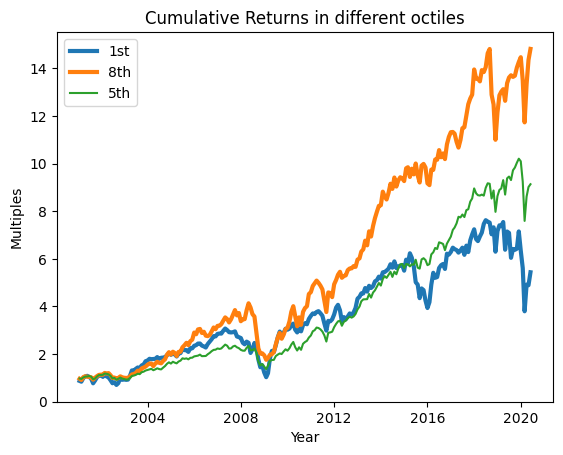

In [5]:
# obtaining results
RESULT.dropna(inplace=True)
CRET = (RESULT+1).cumprod()
plt.plot(CRET.iloc[:,[0,7]],lw=3)
plt.plot(CRET.iloc[:,[4]])
plt.legend(["1st","8th","5th"])
rdiff = RESULT.iloc[:,7]-RESULT.iloc[:,0]
plt.ylabel("Multiples")
plt.xlabel("Year")
plt.title("Cumulative Returns in different octiles")

**visuialising monthly return difference**

Text(0.5, 1.0, '8th and 1st Octile Difference')

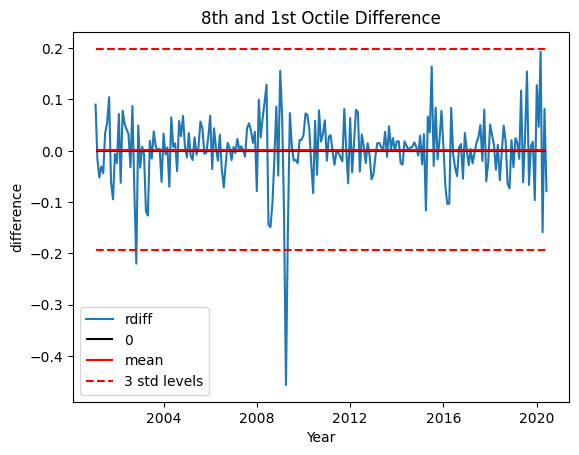

In [6]:
rdiff = RESULT.iloc[:,-1]-RESULT.iloc[:,0]
plt.plot(rdiff)
plt.hlines(0,rdiff.index[0],rdiff.index[-1],'k')
plt.hlines(rdiff.mean(),rdiff.index[0],rdiff.index[-1],'r')
plt.hlines(rdiff.mean()+3*rdiff.std(),rdiff.index[0],rdiff.index[-1],'r',ls="dashed")
plt.hlines(rdiff.mean()-3*rdiff.std(),rdiff.index[0],rdiff.index[-1],'r',ls='dashed')
plt.legend(["rdiff","0","mean","3 std levels"])
plt.ylabel("difference")
plt.xlabel("Year")
plt.title("8th and 1st Octile Difference")

Plots results shows that results the return differene is on average marginally positive, with a large variance. it doesn't seem likely for this mean to be significant, but would not know for sure without full testing. This is supprising considering the difference in return between the two octile portfolios

In [7]:
print("mean: {}".format(round(rdiff.mean(),5)))
print("std: {}".format(round(rdiff.std(),5)))
print("annualised average return: {}%".format(round(((1+rdiff.mean())**12-1)*100,3)))

mean: 0.00251
std: 0.06535
annualised average return: 3.057%


Text(0.5, 1.0, 'Comparison between portfolio and supposed mean rate')

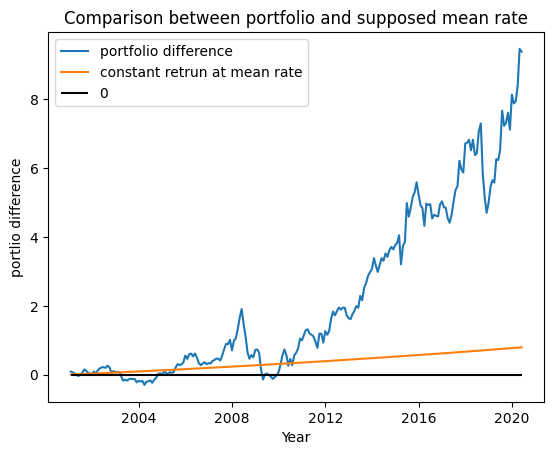

In [8]:
pdiff = CRET.iloc[:,-1]-CRET.iloc[:,0]
comp = pd.DataFrame((1+rdiff.mean()),index=pdiff.index,columns=["3%Ret"])

plt.plot(pdiff)
plt.plot(comp.cumprod()-1)
plt.hlines(0,pdiff.index[0],rdiff.index[-1],'k')
plt.legend(["portfolio difference","constant retrun at mean rate","0"])
plt.ylabel("portlio difference")
plt.xlabel("Year")
plt.title("Comparison between portfolio and supposed mean rate")

this seems to show that the "mean" return difference is a very poor descriptor of the behaviour


**Conducting FF3F Analysis for the momemtum effect**

<ipython-input-1-8bd5a942b1ac>:92: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  self.data = stockdata.join(factordata).dropna(0,how="any",inplace=False)
<ipython-input-1-8bd5a942b1ac>:120: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.reg_results = pd.Series()
<ipython-input-1-8bd5a942b1ac>:134: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Fsig = 1-sps.f.cdf(float(F),k,dof)


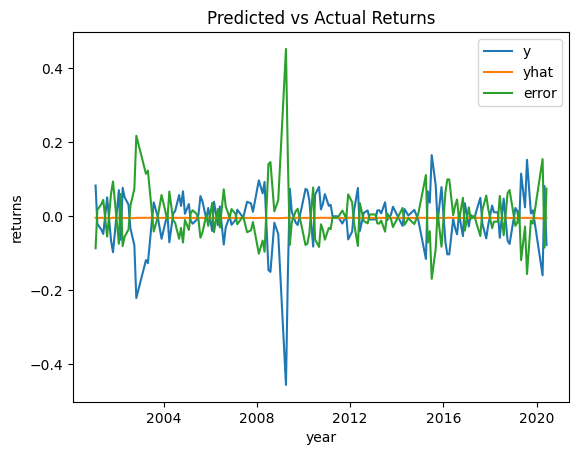

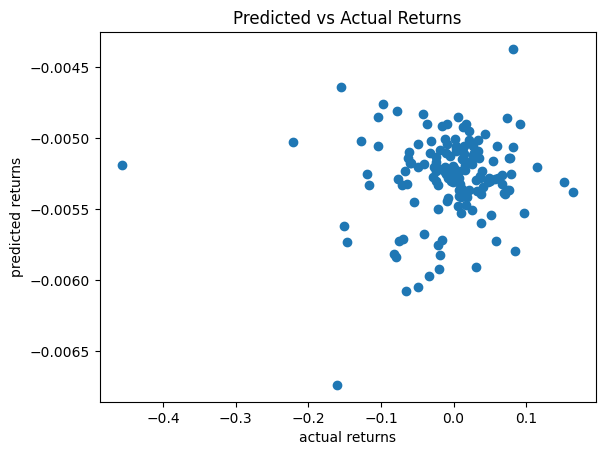

In [9]:
FD = FF3FM.reindex(index=rdiff.index).dropna()
RD = pd.DataFrame(rdiff, columns=["1mr"])
rdfit = Train_FF3F_RidgeCV(FD,RD)
rdfit.RunFit(fit="1mr")
rdfit.FitStats()
rdfit.plt()

Looking at the regression above, we see that FF3F has provided little to no explaination for the momentum effects (orange=predicted returns $(\hat{y})$ , blue = actual returns $(y)$, green = error $(e)$) (scatter plot showing relationship between $\hat{y}$  $\&$  $y$, again no relationship qualitatively )

In [10]:
rdfit.reg_summary

MSE     0.005039
R2      0.000018
F       0.000866
FSig    0.999965
dtype: float64

In [11]:
rdfit.beta_results

,Mkt-RF,SMB,HML
LB,-0.209319,-0.43447,-0.307733
Beta,0.004937,0.001201,-0.000176
UB,0.219192,0.436872,0.307381
SE,0.108397,0.220417,0.155601
Sig,0.481869,0.497829,0.49955


this is reflected in the regression statistics, again seeing no beta values, regression results are also insignificant. Showing that we cannot reject the null hypothesis. We conclude that FF3F provide no explaination for the difference in momentum results. 